# Lista 8 de Cálculo Numérico

In [1]:
using LinearAlgebra # Para uso da função norm
using Plots # para plotar gráficos

## Questão 1.

### a. Compressão (Thierry)

### Compressão de Dados em Matrizes

A ideia da compressão de dados é encontrarmos vetores base dentro da matriz tal que forneçam uma base para a composição de todos os dados. Porém, na vida real precisamos encontrar aproximações, visto que o uso de números reais acabam dificultando uma base L.I de poucos vetores representarem muitos dados.

Na ideia simples, transformamos a matriz em uma multiplicação de duas matrizes, tal que a primeira seja os vetores base e a segunda os coeficientes das combinações lineares.

Com a preocupação de se adequar aos números reais, começamos a analisar isso pelo erro da matriz original com a nova multiplicação das duas matrizes. Para quantificar o erro, usamos a ideia de norma de matriz, que é dada pela soma das normas de cada vetor (colunas) da matriz.

Então, temos que dado a matriz A e o vetor b, precisamos determinar c tal que 

$$min ||A - [b][c^T]|| \longrightarrow min ||[(a_1)(a_2)...(a_n)] - [c_1(b) c_2(b) ... c_n(b)]|| \longrightarrow ||(a_1 - c_1b)(a_2-c_2b)...(a_n-c_nb)||$$

Visto que $e_n = a_n - c_nb \space \bot \space c_nb$, pelo produto interno temos que $e_n^Tc_nb = 0 \longrightarrow (a_n - c_nb)^Tc_nb = 0$. Aplicando a transposta tal que $(M.Q)^T = Q^T.M^T$ e $(M - Q)^T = M^T - Q^T$ obtemos:

$$(a_n - c_nb)^Tc_nb = 0 \longrightarrow (a_n^T - (c_nb)^T)c_nb = 0 \longrightarrow a_n^Tc_nb - c_n^2b^Tb = 0 \longrightarrow a_n^Tc_nb = c_n^2b^Tb $$

Desconsiderando o caso em que $c_n = 0$ pois é um caso muito trivial, podemos dividir a equação em ambos os lados por $c_n$, resultando em:

$$a_n^Tb = c_nb^Tb \longrightarrow c_n = \frac{a_n^Tb}{b^Tb}$$

A partir da análise feita acima podemos escrever um código em Julia para achar o vetor c:

In [2]:
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m, n = size(A)
    A = 1.0 * A # multiplica-se por 1.0 para evitar erros de operações matriciais entre inteiros e float's.
    c = zeros(n)    
    c = A'*(b/(b'*b)) # Operação para achar o vetor c que minimiza a distância perpendicular à reta.
    return c
end

melhores_coords (generic function with 1 method)

In [3]:
A=[1.0001 10.001 3;2.01 20.3 6;3.003 30 9]

3×3 Array{Float64,2}:
 1.0001  10.001  3.0
 2.01    20.3    6.0
 3.003   30.0    9.0

In [4]:
b=[1;2;3]

3-element Array{Int64,1}:
 1
 2
 3

In [5]:
c=melhores_coords(A,b)

3-element Array{Float64,1}:
  1.0020785714285714
 10.04292857142857
  3.0

In [6]:
norm(A-b*c')

0.2534747564213406

In [7]:
function acha_melhor_minimizacao(A)
    n,m = size(A)

    bv = randn(n)
    cv = randn(m)
    
    bw = zeros(m)
    cw = zeros(n)
    
    for i in 1:50
        cv=melhores_coords(A, bv)
        bw=cv
        cw=melhores_coords(A', bw)
        bv=cw
    end
    
    return bv,cv
end

acha_melhor_minimizacao (generic function with 1 method)

In [8]:
function compressao(A,nível)
    m,n=size(A)
    B=zeros(m,nível)
    C=zeros(n,nível)
    
    for i=1:nível
        B[:,i], C[:,i] = acha_melhor_minimizacao(A)
        A= A - B[:,i]*C[:,i]'
    end
    return B,C
end

compressao (generic function with 1 method)

In [9]:
A = randn(3,4)

3×4 Array{Float64,2}:
 -0.279811   1.34256   0.774817  -0.357642
 -2.20998   -0.516419  0.318617  -0.843894
  1.44253    0.622248  0.785725   0.0192598

In [10]:
B,C = compressao(A,3)

([-0.01776039833256679 4.301253886598786 -1.2166342962410077; 0.46851074713316354 1.3118068011256332 1.2942657495204664; -0.30919996217714674 1.7406328200838934 2.031000646317074], [-4.680896527595124 -0.06845511992632569 0.056304985407706745; -1.4526281745256646 0.2658056145364806 -0.14257730070845331; -0.34059553021144695 0.22012878135388475 0.14635596467964979; -1.2522152142733944 -0.11232914986199045 -0.08488492457397774])

In [11]:
norm(A-B*C')

1.4033044459902308e-16

In [12]:
# Chance pequena de existirem colunas Linearmente Dependentes
N = 20
A = randn(N, N)
for i in 1:N
    B,C = compressao(A, i)
    print(i, ": ", norm(A-B*C'), "\n")
end

1: 18.64801167401555
2: 16.584175656384232
3: 14.944560307195143
4: 13.572386622364675
5: 12.24376334380863
6: 10.78013455999053
7: 9.460841545715345
8: 8.398931504523599
9: 7.39405384757471
10: 6.537942563968623
11: 5.733057347924555
12: 4.840770337253301
13: 4.069201595936583
14: 3.2157464978575536
15: 2.5431920605195097
16: 1.920678677181217
17: 1.2120190736753238
18: 0.4543786980714502
19: 0.12236145167022447
20: 5.1538926378924265e-15


In [13]:
N = 20
A = zeros(N, N)
for i in 1:N
    A[:, i] .= i
end
for i in 1:10
    B,C = compressao(A, i)
    print(norm(A-B*C'), "\n")
end

7.944109290391274e-15
0.0
NaN
NaN
NaN
NaN
NaN
NaN
NaN
NaN


### b. Gauss-Jacobi (Vinicius)

O método utilizado será o do ponto fixo, em que iniciamos com o sistema linear:

$$A.x=b$$

Chamaremos $A=M-K$ para um $M$ facilmente invertível e um $K$ resto da matriz.

$$M.x-K.x=b \\
M.x=b+K.x \\
x=M^{-1}.b+M^{-1}.K.x$$

Chamaremos $M^{-1}.b$ de $c$ e o $M^{-1}.K$ de $R$:

$$x=R.x+c$$

Nosso método numérico a ser implementado em cima dessa equação é dar um chute inicial e ir substituindo nela:

$$x^{(0)}=chute_{inicial}$$

$$x^{(k+1)}=R.x^{(k)}+c$$

No caso específico do **Gauss-Jacobi**, a **matriz $M$ facilmente inversível é uma diagonal.**

In [14]:
# nao esta funcionando bem
function gauss_jacobi(A,b,iteracoes)
    M = Diagonal(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    #println(M)
    #println(K)
    #println(R)
    #println(c)
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_jacobi (generic function with 1 method)

In [15]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 8.881784197001252e-16


In [16]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_jacobi(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 1.1102230246251565e-16


### c. Gauss-Seidel (Vinicius)

In [17]:
# nao esta funcionando bem
function gauss_seidel(A,b,iteracoes)
    M = UpperTriangular(A)
    K = M-A
    R = inv(M)*K
    c = inv(M)*b
    
    #println(M)
    #println(K)
    #println(R)
    #println(c)
    
    lin = length(b)
    x = zeros(lin,1)
    for i = 1:iteracoes
        x = R*x + c
    end
    
    return x
end

gauss_seidel (generic function with 1 method)

In [18]:
A = [4 2 1 ; 1 5 1 ; 3 4 10]
b = [7 ; 7 ; 17]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 8.881784197001252e-16


In [19]:
A = [5 2 1 -1 ; 1 3 -1 1 ; 2 0 4 1 ; 1 1 1 8]
b = [1 ; -1 ; 1 ; -3]

x = gauss_seidel(A,b,300)
println("Norma: ", norm(A*x-b))

Norma: 2.220446049250313e-16


## Questão 2. (Thierry)

Equações:

$$2x_1 + x_2 = 2$$
$$-x_1 + 2x_2 = 2$$

Logo,

$$x_1 = 1 - \frac{x_2}{2}$$
$$x_1 = 2x_2 - 2$$

E então,

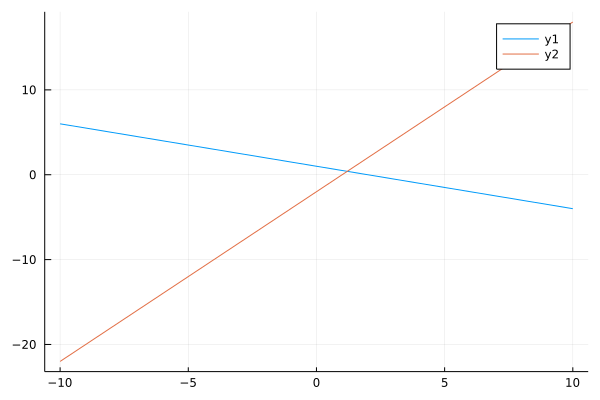

In [20]:
f(x) = 1-x/2
g(x) = 2x - 2

plot([f,g], -10, 10)

In [21]:
A = [2 1; -1 2]
b = [2; 2]

iterador = 1
x_anterior = randn(2)
x_atual = randn(2)
while (norm(x_atual - x_anterior) >= 1e-3)
    x_anterior = x_atual
    x_atual = gauss_jacobi(A, b, iterador)
    print(x_atual, "\n")
    iterador += 1
end
print("\n", "Tolerância: ", norm(A*x_atual - b), "\n")
print("Tolerância: ", norm(x_atual - x_anterior))

[1.0; 1.0]
[0.5; 1.5]
[0.25; 1.25]
[0.375; 1.125]
[0.4375; 1.1875]
[0.40625; 1.21875]
[0.390625; 1.203125]
[0.3984375; 1.1953125]
[0.40234375; 1.19921875]
[0.400390625; 1.201171875]
[0.3994140625; 1.2001953125]
[0.39990234375; 1.19970703125]

Tolerância: 0.0006905339660024879
Tolerância: 0.0006905339660024879

In [22]:
iterador = 1
x_anterior = randn(2)
x_atual = randn(2)
while (norm(x_atual - x_anterior) >= 1e-3)
    x_anterior = x_atual
    x_atual = gauss_seidel(A, b, iterador)
    print(x_atual, "\n")
    iterador += 1
end
print("\n", "Tolerância: ", norm(A*x_atual - b), "\n")
print("Tolerância: ", norm(x_atual - x_anterior))

[0.5; 1.0]
[0.375; 1.25]
[0.40625; 1.1875]
[0.3984375; 1.203125]
[0.400390625; 1.19921875]
[0.39990234375; 1.2001953125]
[0.4000244140625; 1.199951171875]

Tolerância: 0.0001220703125
Tolerância: 0.0002729575167846423

## Questão 3. (Chris)

## Questão 4. (Thierry)

Equações:

$$x_8 = x_6 + x_7 + 500$$
$$x_7 = x_5 + 3000$$
$$x_6 = x_4 + x_2$$
$$x_5 = x_3 + 3000$$
$$x_4 = x_1 + 30000$$
$$x_3 = 9000$$
$$x_2 = 3500$$
$$x_1 = 7000$$

Logo temos o sistema
$$
\begin{bmatrix} 
    0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 \\
    0 & 0 & 0 & 0 & -1 & 0 & 1 & 0 \\
    0 & -1 & 0 & -1 & 0 & 1 & 0 & 0 \\
    0 & 0 & -1 & 0 & 1 & 0 & 0 & 0 \\
    -1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7 \\
    x_8 \\
\end{bmatrix}
=
\begin{bmatrix} 
    500 \\
    3000 \\
    0 \\
    3000 \\
    30000 \\
    9000 \\
    3500 \\
    7000 \\
\end{bmatrix}
$$
E então,

In [23]:
A = [0 0 0 0 0 -1 -1 1; 0 0 0 0 -1 0 1 0; 0 -1 0 -1 0 1 0 0; 0 0 -1 0 1 0 0 0; -1 0 0 1 0 0 0 0; 0 0 1 0 0 0 0 0; 0 1 0 0 0 0 0 0; 1 0 0 0 0 0 0 0]
b = [500; 3000; 0; 3000; 30000; 9000; 3500; 7000]


x = gauss_jacobi(A,b, 5)
print(x)

LoadError: [91mSingularException(1)[39m

## Questão 5. (Chris)

## Questão 6. (Luan)

### Considere a bandeira da Grécia como uma imagem preta e branca e modele com uma matriz A.

Para modelarmos a bandeira da grécia como uma matriz, consideraremos a seguinte imagem, que preparei com muito carinho:

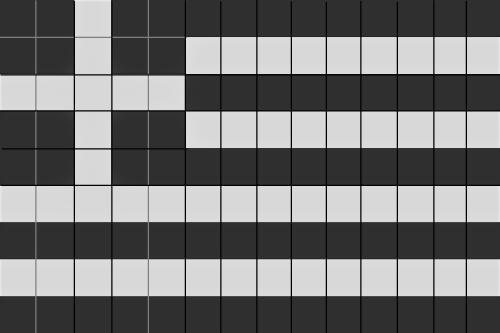

Logo teremos 

$$A = 
\begin{bmatrix} 
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}
$$

#### (a) Qual é o posto da bandeira da Grécia (tal que $A = BC^t$)? O que a matriz $B$ e matriz $C^t$ representam nesse caso? Explique com as suas próprias palavras.

$A = 
\begin{bmatrix} 
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix} 
=
\begin{bmatrix}
    1 & 0 & 1 \\
    1 & 0 & 0 \\
    0 & 0 & 1 \\
    1 & 0 & 0 \\
    1 & 0 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}
$

A matriz $B$ representaria as diferentes "colunas" que a bandeira tem, que, nesse caso, são $3$, o nosso posto. $C^t$ por consequência representaria a ordem das "colunas" na bandeira.

#### (b) Determine dois países tais quais sua bandeira tem posto = 1?

Para posto = 1, podemos pensar em bandeiras horizontais, como Ucrânia, Rússia, Iémen, Indonésia, ...

#### (c) Determine dois países tais quais sua bandeira tem posto = 2?

Para posto = 2, podemos pensar em bandeiras horizontais, porém com algum detalhe simples vertical, como Dinamarca, Finlândia, Suécia, ...

#### (c) Determine dois países tais quais sua bandeira tem posto = 3?

Para posto = 3, podemos pensar em bandeiras verticais com três cores, como Bélgica, França, Chade, Guinea, ...

##### Super interessante pensar nos postos para bandeiras complicadas como a do Brasil, Japão, Arábia Saudita, ...

## Questão 7. (Vinicius)

Primeiro, fazemos a inserção da imagem:

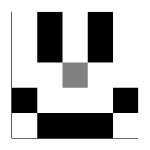

In [24]:
imagem = [0 1 0 1 0 ; 0 1 0 1 0 ; 0 0 0.5 0 0 ; 1 0 0 0 1 ; 0 1 1 1 0]
plot(Gray.(1 .- imagem), size=(150,150), axis=nothing)

Podemos descobrir o posto da imagem através da função rank:

In [25]:
rank(imagem)

3

Para níveis de compressão abaixo do posto da imagem, a nitidez é prejudicada:

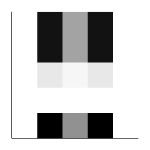

In [26]:
B,c = compressao(imagem, 1)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

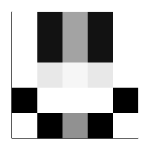

In [27]:
B,c = compressao(imagem, 2)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

A partir do nível de compressão igual ao posto da imagem a nitidez é mantida como a original.

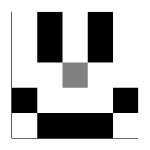

In [28]:
B,c = compressao(imagem, 3)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

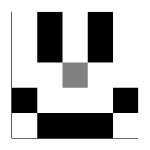

In [29]:
B,c = compressao(imagem, 4)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

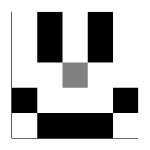

In [30]:
B,c = compressao(imagem, 5)
plot(Gray.(1 .- B*c'), size=(150,150), axis=nothing)

In [31]:
using LinearAlgebra
using Images
using JLD

## Questão 8. (Luan) 

### Encontre (ou desenhe) uma imagem A, com mais ou menos $200 × 200$ pixels (pode ser um pouco maior), que

#### (a) exija um nível de compressão maior que 3 e menor que 6 para recuperar pelo menos 99% de sua norma total.

Escolhemos o logo da Xiaomi levemente modificado para que fique sem curvas, o que justifica o posto 4~5.

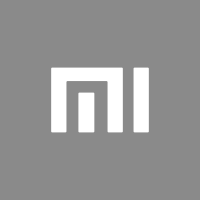

In [32]:
img = load("xiaomi.png");
display(Gray.(img))
raw = channelview(Gray.(img[:,:]));

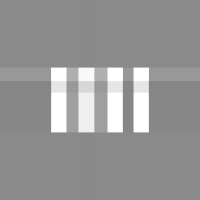

In [33]:
B,C=compressao(raw,2)
display(Gray.(B*C'))

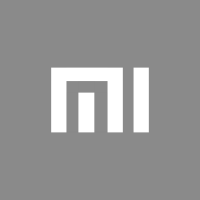

In [34]:
B,C=compressao(raw,4)
display(Gray.(B*C'))

#### (b) exija um nível de compressão maior que 40 para recuperar pelo menos 99% de sua norma total.

Escolhemos um qr code bem complicado para que necessite bastantes postos para restaurar a imagem.

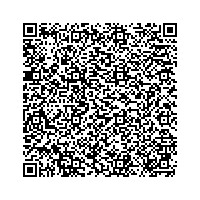

In [35]:
img = load("qrCode.png");
display(Gray.(img))
raw = channelview(Gray.(img[:,:]));

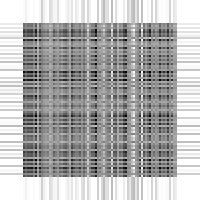

In [36]:
B,C=compressao(raw,2)
display(Gray.(B*C'))

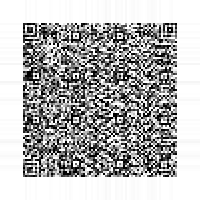

In [37]:
B,C=compressao(raw,20)
display(Gray.(B*C'))

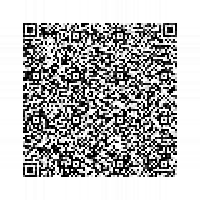

In [39]:
B,C=compressao(raw,41)
display(Gray.(B*C'))

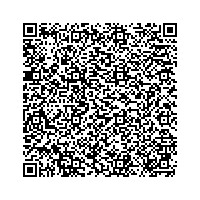

In [40]:
B,C=compressao(raw,100)
display(Gray.(B*C'))